In [2]:
from firstPaperSim import runSingleRegionMultiInput
from src.dataHandling import loadData, makeVoltageDF,makeRateDF,makeInputDF
from plotting.plotAcrossTime import plotConstantInputAcrossTime,plotVoltageAcrossTime,plotRateAcrossTime
from plotting.plotAcrossInput import plotAverageVoltageAcrossInput,plotStdVoltageAcrossInput,splitFrameAcrossInput
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
runSingleRegionMultiInput(saveName='multiInput0_2_15.pkl',
                          eulerTimeEnd=2500,
                          inputAmplitudes=[0,2,15])
runSingleRegionMultiInput(inputAmplitudes=np.linspace(0,20,21),
                          saveName='multiInputMany.pkl',
                          eulerTimeEnd=20000,divisions=200000)

In [6]:
threeStimDataset = loadData("./singleRegion/data/multiInput0_2_15.pkl.pkl")
manyStimDataset = loadData("./singleRegion/data/multiInputMany.pkl.pkl")
plotColorMapping = {'E':'red','I':'blue','eNoise':'green','eInput':'black'}


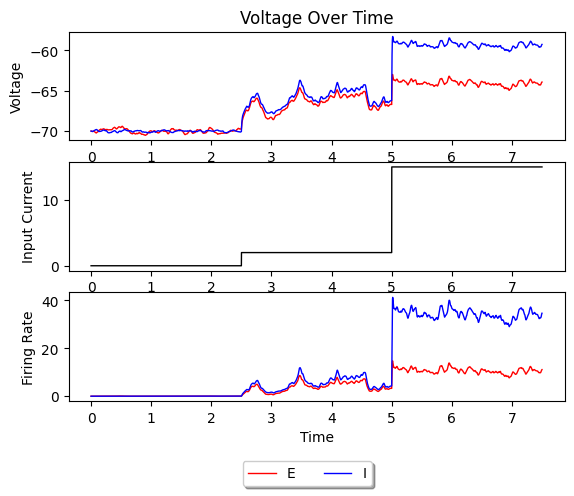

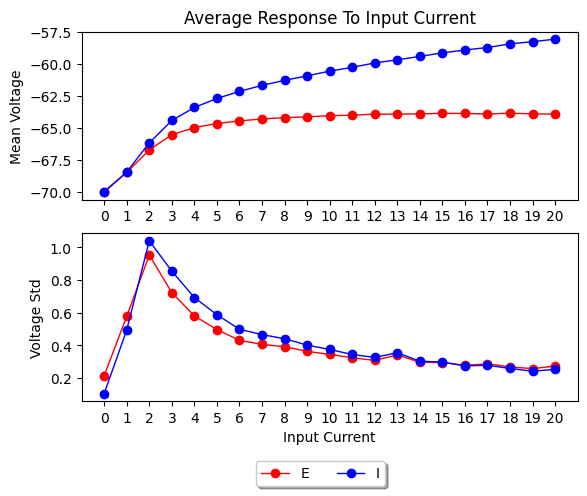

In [14]:
threeStimVoltage = makeVoltageDF(threeStimDataset)
threeStimRate = makeRateDF(threeStimDataset)
threeStimInput = makeInputDF(threeStimDataset)
#makes the first figure
fig,axs = plt.subplots(3,1)
lines = plotVoltageAcrossTime(threeStimVoltage,axs[0],plotColorMapping,xlabel="",lineWidth=1)
plotConstantInputAcrossTime(threeStimInput,'eInput',axs[1],plotColorMapping,xlabel="",title='',lineWidth=1)
plotRateAcrossTime(threeStimRate,axs[2],plotColorMapping,xlabel="Time",title='',lineWidth=1)
fig.legend(lines,['E','I'], bbox_to_anchor=(0.62,0), fancybox=True, shadow=True, ncol=2, bbox_transform=fig.transFigure)
plt.savefig("./singleRegion/figs/threeStepVoltage.png",bbox_inches='tight')
manyStimVoltage = makeVoltageDF(manyStimDataset)
manyStimRate = makeRateDF(manyStimDataset)
manyStimInput = makeInputDF(manyStimDataset)
#makes the second fFigureigure
fig,axs = plt.subplots(2,1)
lines = plotAverageVoltageAcrossInput(manyStimVoltage,manyStimInput,axs[0],plotColorMapping,'eInput',xlabel="",title='Average Response To Input Current')
plotStdVoltageAcrossInput(manyStimVoltage,manyStimInput,axs[1],plotColorMapping,'eInput',xlabel='Input Current',title='')
fig.legend(lines,['E','I'], bbox_to_anchor=(0.62,0), fancybox=True, shadow=True, ncol=2, bbox_transform=fig.transFigure)
plt.savefig("./singleRegion/figs/manyStepVariablility.png",bbox_inches='tight')
